# K-means clustering - 5000 movies dataset - ML project10

## Import the necessary liabraries

In [22]:
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Edit plot styling

In [23]:
sns.set()
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

## Load the dataset into pandas dataframe

In [24]:
moviesDF = pd.read_csv(r'C:\Users\itumeleng\Desktop\Python Programs\movie_metadata.csv')

## Inspect dataframe

In [25]:
print('This dataframe contains:',moviesDF.shape[0],'Observations and ',moviesDF.shape[1],'Attributes')

This dataframe contains: 5043 Observations and  28 Attributes


In [26]:
moviesDF.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [27]:
moviesDF['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [28]:
moviesDF.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [29]:
actorAndDirectorFBLikes = moviesDF.iloc[:,4:6]


## Drop Null instances

In [30]:
nullInstances = actorAndDirectorFBLikes.isna().sum()
print('We have the following number of null observations:\n',nullInstances)

We have the following number of null observations:
 director_facebook_likes    104
actor_3_facebook_likes      23
dtype: int64


In [31]:
actorAndDirectorFBLikes.dropna(inplace=True)

## Check Null Instances

In [32]:
nullInstances = actorAndDirectorFBLikes.isna().sum()
print(nullInstances)

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64


## Create and Train clustering model 

In [33]:
kmeans = KMeans(n_clusters=5)

In [34]:
kmeans.fit(actorAndDirectorFBLikes)

KMeans(n_clusters=5)

## Find cluster centers

In [35]:
centriods = kmeans.cluster_centers_
print(centriods)

[[  153.94452806   424.19264674]
 [12490.38461538   605.93269231]
 [  210.77011494 11126.43678161]
 [17621.21212121   596.10606061]
 [17545.45454545 14545.45454545]]


## Find Labels

In [36]:
labels = kmeans.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [37]:
print(type(labels))

<class 'numpy.ndarray'>


In [38]:
print(len(labels))

4919


## Find how many instance belong to each class respectively

In [39]:
unique,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{np.int32(0): np.int64(4651), np.int32(1): np.int64(104), np.int32(2): np.int64(87), np.int32(3): np.int64(66), np.int32(4): np.int64(11)}


## Plot the data

In [40]:
actorAndDirectorFBLikes['cluster'] = kmeans.labels_

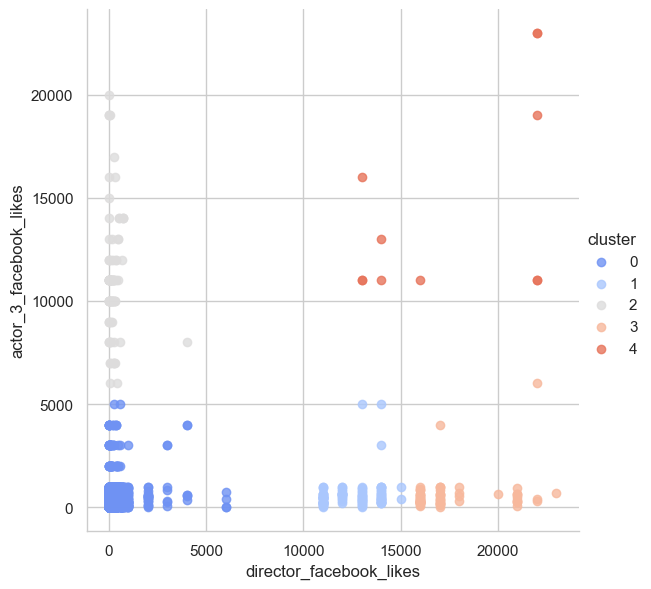

In [41]:
sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data=actorAndDirectorFBLikes,
           hue='cluster',palette='coolwarm',height=6,aspect=1,fit_reg=False)